In [1]:
from numpy import *
from scipy import interpolate
import matplotlib.pyplot as plt

In [2]:
f_empty = genfromtxt("cmos_a0.64_empty_flux.dat", delimiter=",")
f_flat = genfromtxt("cmos_a0.64_flat_flux.dat", delimiter=",")
f_texture = genfromtxt("cmos_a0.64_texture_flux.dat", delimiter=",")

In [3]:
lambdas = 1/f_empty[:,0]

In [4]:
R_texture = -f_texture[:,1]/f_empty[:,2]
A_texture_grid = (f_texture[:,2]-f_texture[:,3])/f_empty[:,2]
A_texture_sub = (f_texture[:,3]-f_texture[:,4])/f_empty[:,2]

In [5]:
R_flat = -f_flat[:,1]/f_empty[:,2]
A_flat_grid = (f_flat[:,2]-f_flat[:,3])/f_empty[:,2]
A_flat_sub = (f_flat[:,3]-f_flat[:,4])/f_empty[:,2]

In [6]:
lambdas_linear = linspace(0.7,1.0,50)

In [7]:
R_t = interpolate.interp1d(lambdas, R_texture, kind='cubic')
R_texture_linear = R_t(lambdas_linear)
A_t_g = interpolate.interp1d(lambdas, A_texture_grid, kind='cubic')
A_texture_grid_linear = A_t_g(lambdas_linear)
A_t_s = interpolate.interp1d(lambdas, A_texture_sub, kind='cubic')
A_texture_sub_linear = A_t_s(lambdas_linear)

In [8]:
A_f_s = interpolate.interp1d(lambdas, A_flat_sub, kind='cubic')
A_flat_sub_linear = A_f_s(lambdas_linear)

In [9]:
plt.figure()
plt.plot(lambdas_linear,A_texture_sub_linear,'bo-',label='Si substrate (absorption)');
plt.plot(lambdas_linear,A_texture_grid_linear,'ro-',label='W grid (absorption)');
plt.plot(lambdas_linear,R_texture_linear,'go-',label='device (reflection)');
plt.axis([0.7, 1.0, 0, 0.5]);
plt.xticks([t for t in arange(0.7,1.0,0.1)]);
plt.legend(loc='upper right');

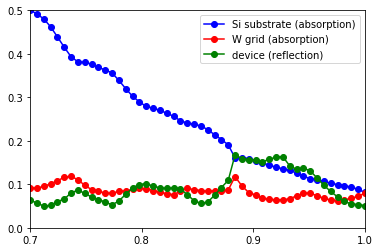

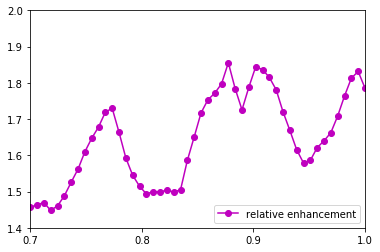

In [10]:
plt.figure()
plt.plot(lambdas_linear,A_texture_sub_linear/A_flat_sub_linear,'mo-',label='relative enhancement');
plt.axis([0.7, 1.0, 1.4, 2.0]);
plt.xticks([t for t in arange(0.7,1.0,0.1)]);
plt.legend(loc='lower right');
plt.show()

In [11]:
print("flat substrate absorption: %0.6f (mean), %0.6f (std. dev.)" % (mean(A_flat_sub_linear),std(A_flat_sub_linear)))

flat substrate absorption: 0.153823 (mean), 0.085151 (std. dev.)


In [12]:
print("textured substrate absorption: %0.6f (mean), %0.6f (std. dev.)" % (mean(A_texture_sub_linear),std(A_texture_sub_linear)))

textured substrate absorption: 0.245434 (mean), 0.122460 (std. dev.)
